#CHE1147 Assignment 2
#Nicholas Jalen Cheng
# 1001310761 

# 1 Criminal investigation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read file

In [2]:
phone_df = pd.read_excel("phone_data.xlsx")
phone_df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


## 1.2 Most and least frequent outgoing numbers

### Problem 1

In [3]:
# Filter out non-outgoing calls
outgoing_df = phone_df[phone_df["Call type"]=="Outgoing"]
# Extract two Columns and aggregate the table by the number called both to and from with the count
outgoing_call_frequency = outgoing_df[["Call type","Number called (to/from)"]].groupby('Number called (to/from)').count()
# Rename the column
outgoing_call_frequency.columns = ["Call Frequency"]
# Sort the Table 
outgoing_call_frequency_sorted_descending = outgoing_call_frequency.sort_values("Call Frequency", ascending = False)
# Take the top 3 rows
most_frequent_table = outgoing_call_frequency_sorted_descending.head(3)
most_frequent_table

,Call Frequency
Number called (to/from),
A_1,111
A_5,48
B_3,28


### Problem 2

In [4]:
# Sort the Table 
outgoing_call_frequency_sorted_ascending = outgoing_call_frequency.sort_values("Call Frequency", ascending = True)
# Take the rows with call frequency value less than or equal to the call frequency on the thrid row (solve for ties)
least_frequent_table = outgoing_call_frequency_sorted_ascending[outgoing_call_frequency_sorted_ascending["Call Frequency"]<=outgoing_call_frequency_sorted_ascending.iloc[2]["Call Frequency"]]
least_frequent_table

,Call Frequency
Number called (to/from),
D_1,1
F_5,1
F_4,1
F_3,1
F_2,1
F_1,1
E_5,1
E_4,1
D_5,1


## 1.3 Highest and lowest total duration of outgoing calls

In [5]:
# Filter out non-outgoing calls
outgoing_df = phone_df[phone_df["Call type"]=="Outgoing"]
# Extract two columns and aggregate the table by the number called both to and from with the sum of duration
outgoing_call_duration = outgoing_df[["Duration","Number called (to/from)"]].groupby('Number called (to/from)').sum()
# Rename the column
outgoing_call_duration.columns = ["Total Call Duration"]
# Sort the table
outgoing_call_duration_sorted_descending = outgoing_call_duration.sort_values("Total Call Duration", ascending = False)
# Take the top 3 rows
longest_duration_table = outgoing_call_duration_sorted_descending.head(3)
longest_duration_table

,Total Call Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96


In [6]:
# Sort the table
outgoing_call_duration_sorted_ascending = outgoing_call_duration.sort_values("Total Call Duration", ascending = True)
# Take the rows with total call duration value less than or equal to the total call duration on the thrid row (solve for ties)
shortest_duration_table = outgoing_call_duration_sorted_ascending[outgoing_call_duration_sorted_ascending["Total Call Duration"]<=outgoing_call_duration_sorted_ascending.iloc[2]["Total Call Duration"]]
shortest_duration_table

,Total Call Duration
Number called (to/from),
E_5,1
E_4,1
D_5,1
C_1,1


## 1.4 Location of outgoing calls

Assume: "location of outgoing calls" means the caller location therefore "From city" column

In [7]:
# Filter out non-outgoing calls
outgoing_df = phone_df[phone_df["Call type"]=="Outgoing"]
# Extract two columns and aggregate the table by the city location of the call with count
outgoing_call_location = outgoing_df[["From city","Number called (to/from)"]].groupby("From city").count()
# rename the column
outgoing_call_location.columns = ["Call Frequency"]
outgoing_call_location

,Call Frequency
From city,
CLAREMONT ON,1
NEWMARKET ON,2
TORONTO ON,244


"To city" version

In [8]:
# Filter out non-outgoing calls
outgoing_df = phone_df[phone_df["Call type"]=="Outgoing"]
# Extract two columns and aggregate the table by the city location of the call with count
outgoing_call_location = outgoing_df[["To city","Number called (to/from)"]].groupby("To city").count()
# rename the column
outgoing_call_location.columns = ["Call Frequency"]
outgoing_call_location

,Call Frequency
To city,
800 SERV SERV 800 ON,1
866 SERV SERV 866 ON,1
877 SERV SERV 877 ON,1
888 SERV SERV 888 ON,1
AURORA ON,1
NEWMARKET ON,1
OAK RIDGES ON,28
RICHMONDHL ON,10
STOUFFVL ON,1


## 1.5 Incoming and Outgoing calls pattern

### Problem 1

In [9]:
# convert the date column to type datetime
phone_df['Date']= pd.to_datetime(phone_df['Date'])
# Create new column Month
phone_df['Month'] = phone_df['Date'].dt.month
# Extract three columns and aggregate the table by Month and Call type by the Sum of duration, then unstack call type
call_duration_by_month_type = phone_df[["Call type","Month","Duration"]].groupby(["Month","Call type"]).sum().unstack("Call type")
call_duration_by_month_type

Duration         
Call type Incoming Outgoing
Month                      
7               84      190
8               54      281
9              244      714
10              63      621
11              87      196

### Problem 2

Text(0.5, 1.0, 'Total Call Duration form Incoming and Outgoing Calls per Month')

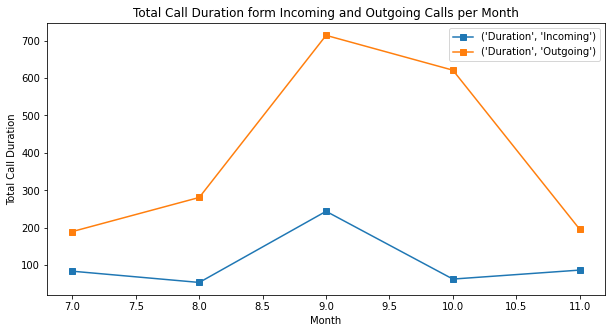

In [10]:
# Plot the results
plt.figure(figsize=(10,5))
plt.plot(call_duration_by_month_type.index, call_duration_by_month_type, "-s" )
plt.legend(call_duration_by_month_type.columns, loc='best')
plt.xlabel('Month')
plt.ylabel('Total Call Duration')
plt.title("Total Call Duration form Incoming and Outgoing Calls per Month")

### Problem 3

Spike of total call durations during September and October for outgoing calls. Spike of total call durations during September for incoming calls. Imbalance between total call duration for incoming and outgoing calls. Location of outgoing calls both from and to city are concentrated in certain areas. Total outgoing call duration per number have values ranging from 1 to 1000. Significant number of numbers have low outgoing call frequencies. Outgoing calls are concentrated to certain numbers. Top numbers for total outgoing call duration match the top number of top outgoing call frequencies.

This phone line has a large demand for outgoing calls around September, situated more or less at a constant location. Consistent calls with a small group of numbers for long durations, and a large group of numbers with short durations. Therefore, it seems like this line is used more like a personal phone rather than for criminal activates. Reason is that phones used for criminal actives will like to keep calls short and random to avoid being traced.



## 1.6 Distribution of calls

Text(0.5, 1.0, 'Outbound Call Counts')

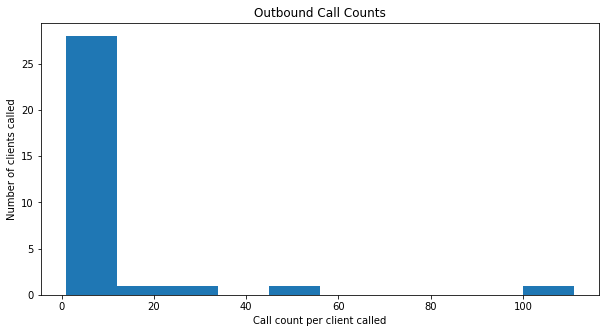

In [11]:
# plot the outgoing call frequency with a histogram for frequency
plt.figure(figsize=(10,5))
plt.hist(outgoing_call_frequency["Call Frequency"])
plt.xlabel('Call count per client called')
plt.ylabel('Number of clients called')
plt.title("Outbound Call Counts")

# 2 The ergodicity problem in economics

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.3 Coding the problem

### Step 1

Create Pandas dataframe with N by w random numbers with columns names specificed


In [13]:
N = 100 
w = 100
np.random.seed(0)
probability_df = pd.DataFrame(np.random.rand(N,w), columns = ("prob_" + str(x) for x in range(w)))
probability_df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,prob_60,prob_61,prob_62,prob_63,prob_64,prob_65,prob_66,prob_67,prob_68,prob_69,prob_70,prob_71,prob_72,prob_73,prob_74,prob_75,prob_76,prob_77,prob_78,prob_79,prob_80,prob_81,prob_82,prob_83,prob_84,prob_85,prob_86,prob_87,prob_88,prob_89,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820,...,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695
1,0.677817,0.270008,0.735194,0.962189,0.248753,0.576157,0.592042,0.572252,0.223082,0.952749,0.447125,0.846409,0.699479,0.297437,0.813798,0.396506,0.881103,0.581273,0.881735,0.692532,0.725254,0.501324,0.956084,0.643990,0.423855,0.606393,0.019193,0.301575,0.660174,0.290078,0.618015,0.428769,0.135474,0.298282,0.569965,0.590873,0.574325,0.653201,0.652103,0.431418,...,0.697429,0.453543,0.722056,0.866382,0.975522,0.855803,0.011714,0.359978,0.729991,0.171630,0.521037,0.054338,0.199997,0.018522,0.793698,0.223925,0.345352,0.928081,0.704414,0.031839,0.164694,0.621478,0.577229,0.237893,0.934214,0.613966,0.535633,0.589910,0.730122,0.311945,0.398221,0.209844,0.186193,0.944372,0.739551,0.490459,0.227415,0.254356,0.058029,0.434417
2,0.311796,0.696343,0.377752,0.179604,0.024679,0.067250,0.679393,0.453697,0.536579,0.896671,0.990339,0.216897,0.663078,0.263322,0.020651,0.758379,0.320017,0.383464,0.588317,0.831048,0.628982,0.872651,0.273542,0.798047,0.185636,0.952792,0.687488,0.215508,0.947371,0.730856,0.253942,0.213312,0.518201,0.025663,0.207470,0.424685,0.374170,0.463575,0.277629,0.586784,...,0.240829,0.100294,0.016430,0.929529,0.669917,0.785153,0.281730,0.586410,0.063955,0.485628,0.977495,0.876505,0.338159,0.961570,0.231702,0.949319,0.941378,0.799203,0.630448,0.874288,0.293020,0.848944,0.617877,0.013237,0.347234,0.148141,0.981829,0.478370,0.497391,0.639473,0.368585,0.136900,0.822118,0.189848,0.511319,0.224317,0.097844,0.862192,0.972919,0.960835
3,0.906555,0.774047,0.333145,0.081101,0.407241,0.232234,0.132488,0.053427,0.725594,0.011427,0.770581,0.146947,0.079522,0.089603,0.672048,0.245367,0.420539,0.557369,0.860551,0.727044,0.270328,0.131483,0.055374,0.301599,0.262118,0.456141,0.683281,0.695625,0.283519,0.379927,0.181151,0.788546,0.056848,0.696997,0.778695,0.777408,0.259423,0.373813,0.587600,0.272822,...,0.187131,0.903984,0.543806,0.456911,0.882041,0.458604,0.724168,0.399025,0.904044,0.690025,0.699622,0.327720,0.756779,0.636061,0.240020,0.160539,0.796391,0.959167,0.458139,0.590984,0.857723,0.457223,0.951874,0.575751,0.820767,0.908844,0.815524,0.159414,0.628898,0.398434,0.062713,0.424032,0.258684,0.849038,0.033305,0.958983,0.355369,0.356707,0.016329,0.185232
4,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,0.015606,0.428796,0.068074,0.251941,0.221161,0.253191,0.131055,0.012036,0.115484,0.618480,0.974256,0.990345,0.409054,0.162954,0.638762,0.490305,0.989410,0.065304,0.783234,0.288398,0.241419,0.662505,0.246063,0.665859,0.517309,0.424089,0.554688,0.287052,0.706575,0.414857,...,0.272437,0.379057,0.374296,0.748788,0.237807,0.171853,0.449292,0.304468,0.839189,0.237742,0.502

### Step 2

Add an additional N by w matrix to the dataframe with specified column names

In [14]:
simulation_100 = probability_df.merge(pd.DataFrame(np.full((N, w), 100), columns = ("Balance_" + str(x) for x in range(w))), left_index = True, right_index = True)
simulation_100

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,Balance_60,Balance_61,Balance_62,Balance_63,Balance_64,Balance_65,Balance_66,Balance_67,Balance_68,Balance_69,Balance_70,Balance_71,Balance_72,Balance_73,Balance_74,Balance_75,Balance_76,Balance_77,Balance_78,Balance_79,Balance_80,Balance_81,Balance_82,Balance_83,Balance_84,Balance_85,Balance_86,Balance_87,Balance_88,Balance_89,Balance_90,Balance_91,Balance_92,Balance_93,Balance_94,Balance_95,Balance_96,Balance_97,Balance_98,Balance_99
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,0.677817,0.270008,0.735194,0.962189,0.248753,0.576157,0.592042,0.572252,0.223082,0.952749,0.447125,0.846409,0.699479,0.297437,0.813798,0.396506,0.881103,0.581273,0.881735,0.692532,0.725254,0.501324,0.956084,0.643990,0.423855,0.606393,0.019193,0.301575,0.660174,0.290078,0.618015,0.428769,0.135474,0.298282,0.569965,0.590873,0.574325,0.653201,0.652103,0.431418,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,0.311796,0.696343,0.377752,0.179604,0.024679,0.067250,0.679393,0.453697,0.536579,0.896671,0.990339,0.216897,0.663078,0.263322,0.020651,0.758379,0.320017,0.383464,0.588317,0.831048,0.628982,0.872651,0.273542,0.798047,0.185636,0.952792,0.687488,0.215508,0.947371,0.730856,0.253942,0.213312,0.518201,0.025663,0.207470,0.424685,0.374170,0.463575,0.277629,0.586784,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,0.906555,0.774047,0.333145,0.081101,0.407241,0.232234,0.132488,0.053427,0.725594,0.011427,0.770581,0.146947,0.079522,0.089603,0.672048,0.245367,0.420539,0.557369,0.860551,0.727044,0.270328,0.131483,0.055374,0.301599,0.262118,0.456141,0.683281,0.695625,0.283519,0.379927,0.181151,0.788546,0.056848,0.696997,0.778695,0.777408,0.259423,0.373813,0.587600,0.272822,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,0.015606,0.428796,0.068074,0.251941,0.221161,0.253191,0.131055,0.012036,0.115484,0.618480,0.974256,0.990345,0.409054,0.162954,0.638762,0.490305,0.989410,0.065304,0.783234,0.288398,0.241419,0.662505,0.246063,0.665859,0.517309,0.424089,0.554688,0.287052,0.706575,0.414857,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029929,0.985128,0.094747,0.450997,0.838719,0.421550,0.248752,0.414002,0.823889,0.044891,0.488778,0.193506,0.060269,0.785554,0.014483,0.414958,0.545503,0.172884,0.899457,0.408681,0.182104,0.611180,0.639449,0.388671,0.031468,0.661646,0.237767,0.149926,0.820937,0.504241,0.447930,0.754

### Step 3

Calculation: 

Assume N = 100 Coin tosses e.g. first row of the dataframe from columns w to 2*w will contain the resulting balance after the first coin toss

In [15]:
# loop through each row
for x in range(N):
  # loop from column w to 2*w
  for y in range(w, 2*w):
    # if condition for each win/loss case based on probability
    change =  1.5 if simulation_100.iloc[x][y-w] >= 0.5 else 0.6
    # if the iteration is on the first row
    if x == 0:
      # resulting balance is 100 * win/loss reward
      simulation_100.iloc[[x],[y]] = 100*change
    else:
      # update balance with the coin toss results and the previous balance
      simulation_100.iloc[[x],[y]] = simulation_100.iloc[x-1][y]*change

### Step 4

In [16]:
# Extract out the balance columns
gambler_100 = simulation_100[list(("Balance_" + str(x) for x in range(w)))]

Text(0.5, 1.0, 'N = 100, W = 100, Multiplicative Reward/Penalty Simulation')

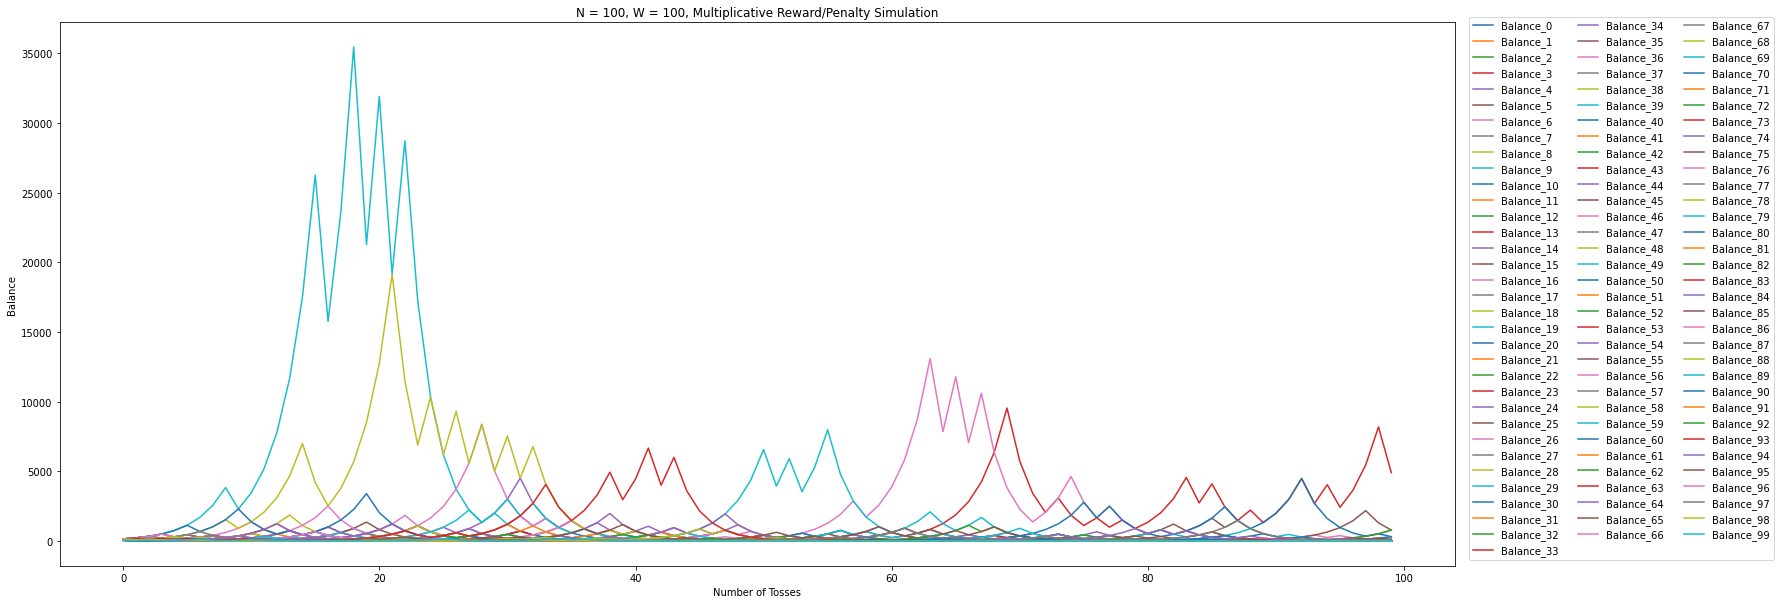

In [17]:
# Plot the results
ax = gambler_100.plot(figsize=(25,10));
ax.legend(loc=(1.01, 0.01), ncol=3)
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 100, W = 100, Multiplicative Reward/Penalty Simulation")

Calculate the numnber of balances more than $100

In [18]:
len(gambler_100.loc[N-1][gambler_100.loc[N-1]>100])

11

11 gamblers have more than $100 by the end of 100 coin tosses

**N = 1,000 Case**

Repeat the same code with different N and w values

In [19]:
N = 1000
w = 100
np.random.seed(42)
probability_1000_df = pd.DataFrame(np.random.rand(N,w), columns = ("prob_" + str(x) for x in range(w)))
simulation_1000 = probability_1000_df.merge(pd.DataFrame(np.full((N, w), 100), columns = ("Balance_" + str(x) for x in range(w))), left_index = True, right_index = True)

for x in range(N):
  for y in range(w, 2*w):
    change =  1.5 if simulation_1000.iloc[x][y-w] >= 0.5 else 0.6
    if x == 0:
      simulation_1000.iloc[[x],[y]] = 100*change
    else:
      simulation_1000.iloc[[x],[y]] = simulation_1000.iloc[x-1][y]*change

Text(0.5, 1.0, 'N = 1000, W = 100, Multiplicative Reward/Penalty Simulation')

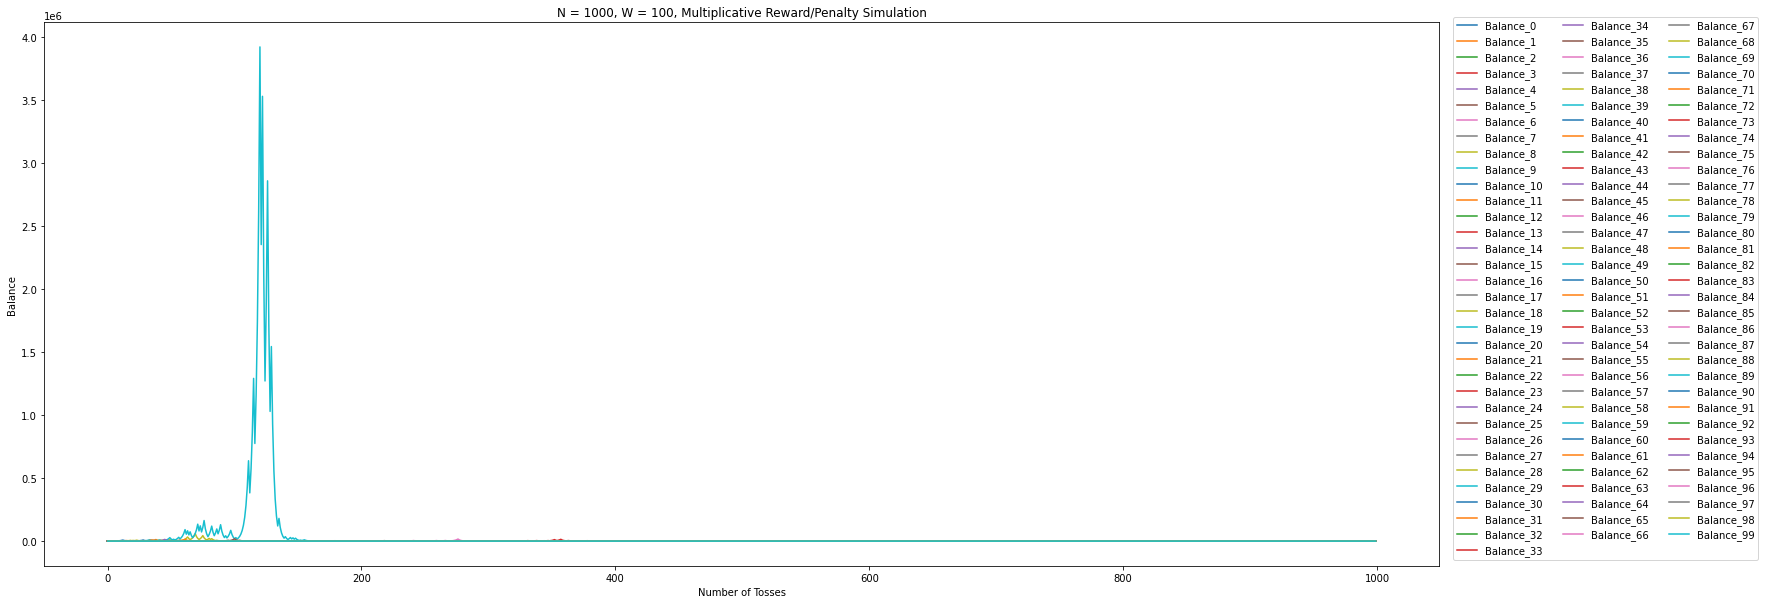

In [20]:
gambler_1000 = simulation_1000[list(("Balance_" + str(x) for x in range(w)))]
ax = gambler_1000.plot(figsize=(25,10));
ax.legend(loc=(1.01, 0.01), ncol=3)
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 1000, W = 100, Multiplicative Reward/Penalty Simulation")

Calculate the numnber of balances more than $100

In [21]:
len(gambler_1000.loc[N-1][gambler_1000.loc[N-1]>100].index)

0

0 gamblers have more than $100 by the end of 1000 coin tosses

### Step 5

Plot the mean and median of the balance time series

Text(0.5, 1.0, 'N = 1000, W = 100, Mean and Median Multiplicative Reward/Penalty Simulation (Linear Scale)')

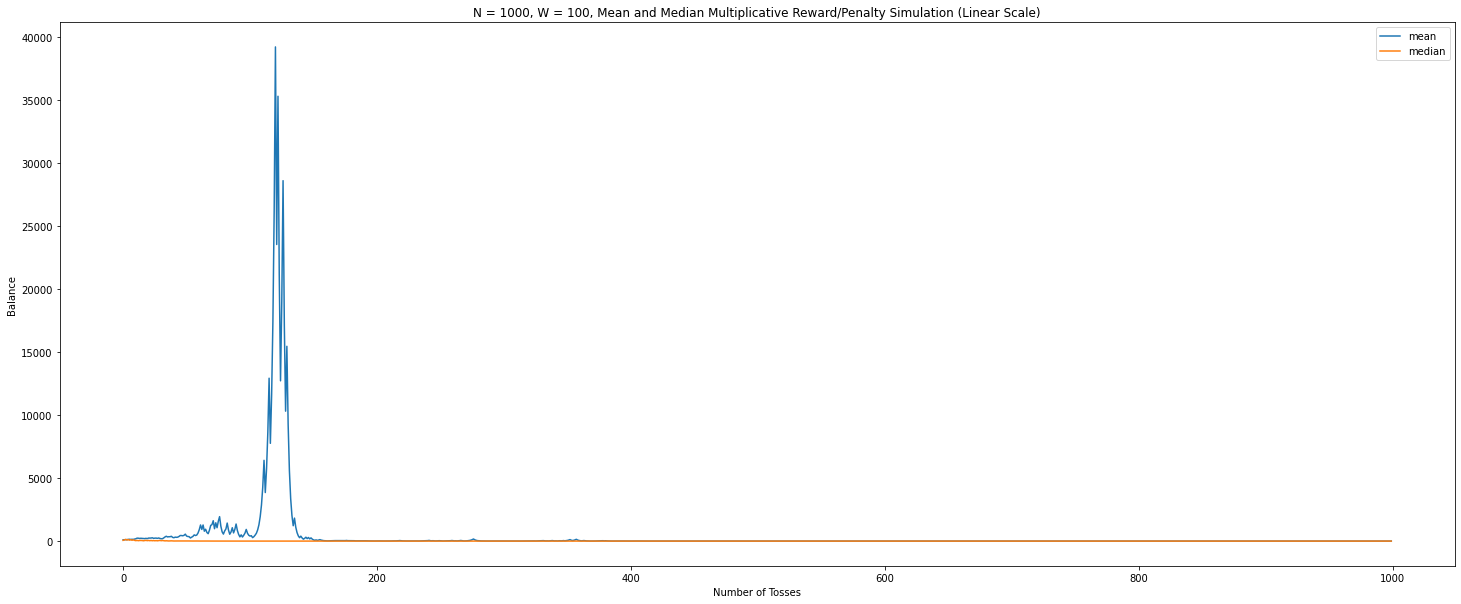

In [22]:
mean_median_1000 = pd.DataFrame((np.array([list(gambler_1000.mean(axis=1)),list(gambler_1000.median(axis=1))])).transpose(), columns = ["mean","median"])
ax = mean_median_1000.plot(figsize=(25,10))
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 1000, W = 100, Mean and Median Multiplicative Reward/Penalty Simulation (Linear Scale)")

Plot the mean and median of the balance time series on a log scale

Text(0.5, 1.0, 'N = 1000, W = 100, Mean and Median Multiplicative Reward/Penalty Simulation (Log Scale)')

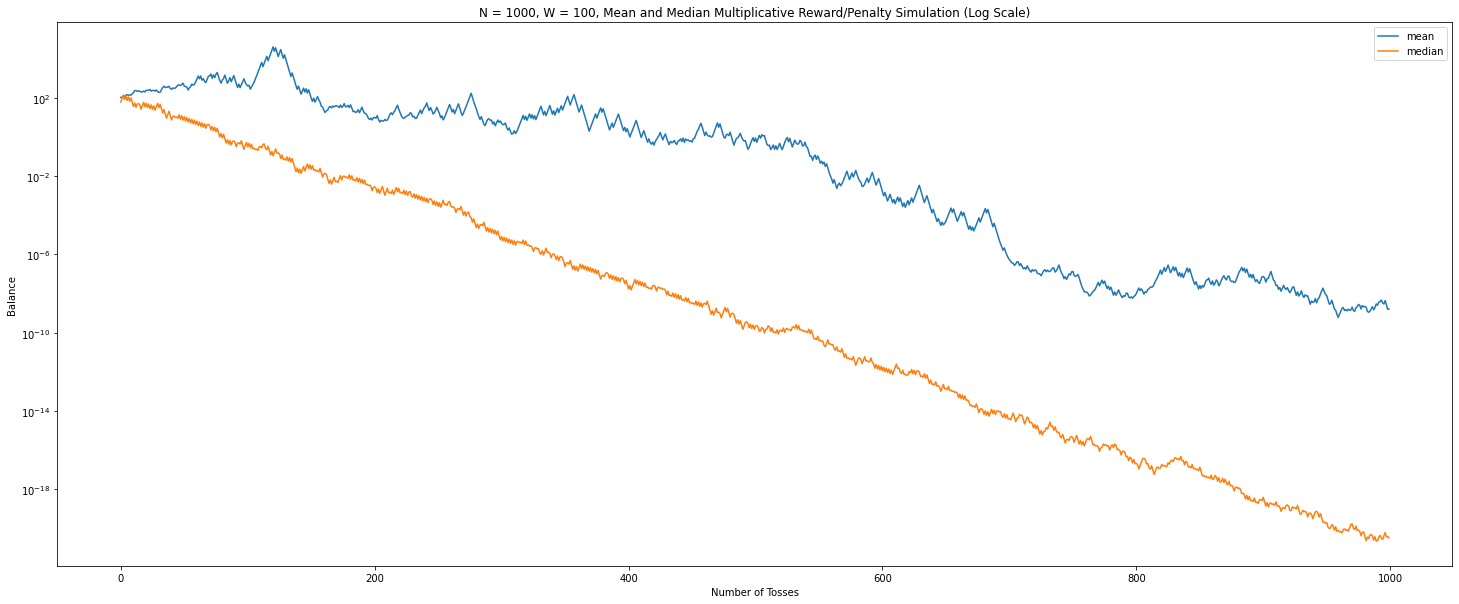

In [23]:
ax = mean_median_1000.plot(figsize=(25,10), logy=True)
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 1000, W = 100, Mean and Median Multiplicative Reward/Penalty Simulation (Log Scale)")

**Due to large values in the calculated data, it is hard to read the linear scale plot. On the log scale plot it is clear that both mean and median are showing a decreasing trend over time. Median has a clear relative stright linear decrease over time (on log scale), while mean has some degree of fluctuation/randomness while the value decreases.**

### Step 6

**Constant Reward/Penalty Simulation**

Repeat the same code with different N and w values, and modified reward/penalty.

In [24]:
N = 10
w = 1000
np.random.seed(42)
probability_10_df = pd.DataFrame(np.random.rand(N,w), columns = ("prob_" + str(x) for x in range(w)))
simulation_10 = probability_10_df.merge(pd.DataFrame(np.full((N, w), 100), columns = ("Balance_" + str(x) for x in range(w))), left_index = True, right_index = True)

for x in range(N):
  for y in range(w, 2*w):
    change =  50 if simulation_10.iloc[x][y-w] >= 0.5 else -40
    if x == 0:
      simulation_10.iloc[[x],[y]] = 100+change
    else:
      simulation_10.iloc[[x],[y]] = simulation_10.iloc[x-1][y]+change

Text(0.5, 1.0, 'N = 10, W = 1000, Constant Reward/Penalty Simulation')

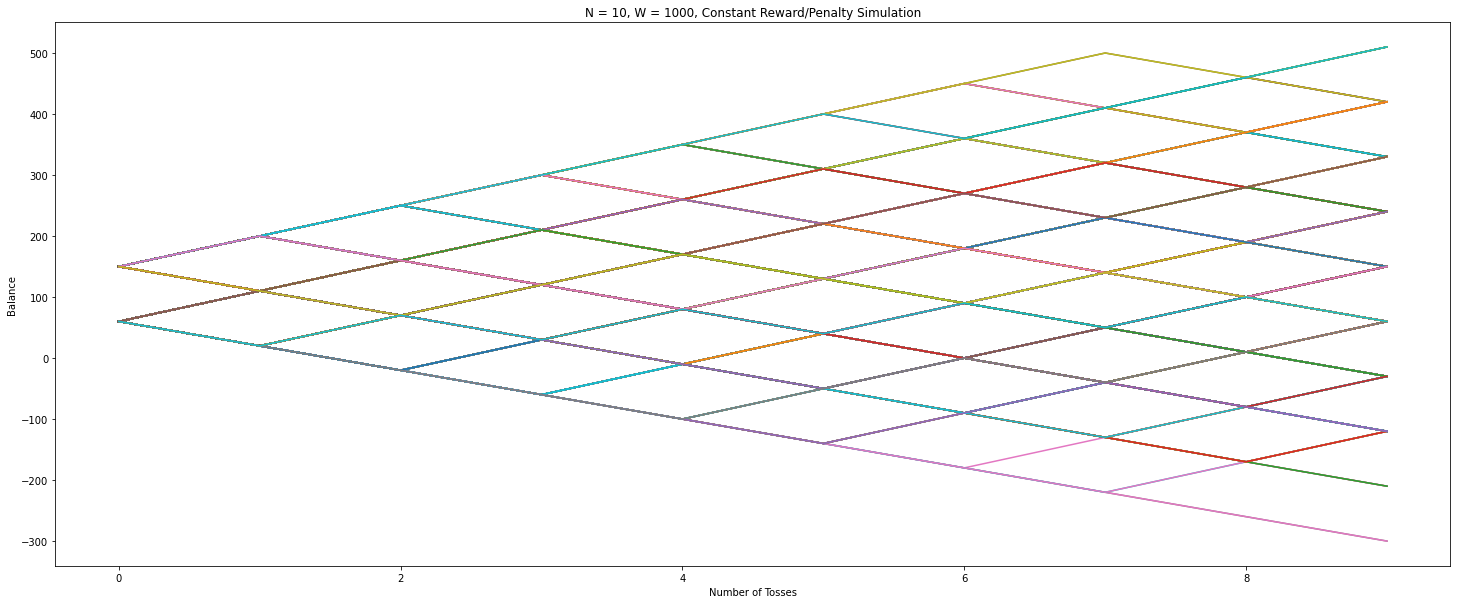

In [25]:
gambler_10 = simulation_10[list(("Balance_" + str(x) for x in range(w)))]
ax = gambler_10.plot(figsize=(25,10),legend=False);
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 10, W = 1000, Constant Reward/Penalty Simulation")

In [26]:
len(gambler_10.loc[N-1][gambler_10.loc[N-1]<=100].index)

390

Text(0.5, 1.0, 'N = 10, W = 1000, Mean and Median Constant Reward/Penalty Simulation (Linear Scale)')

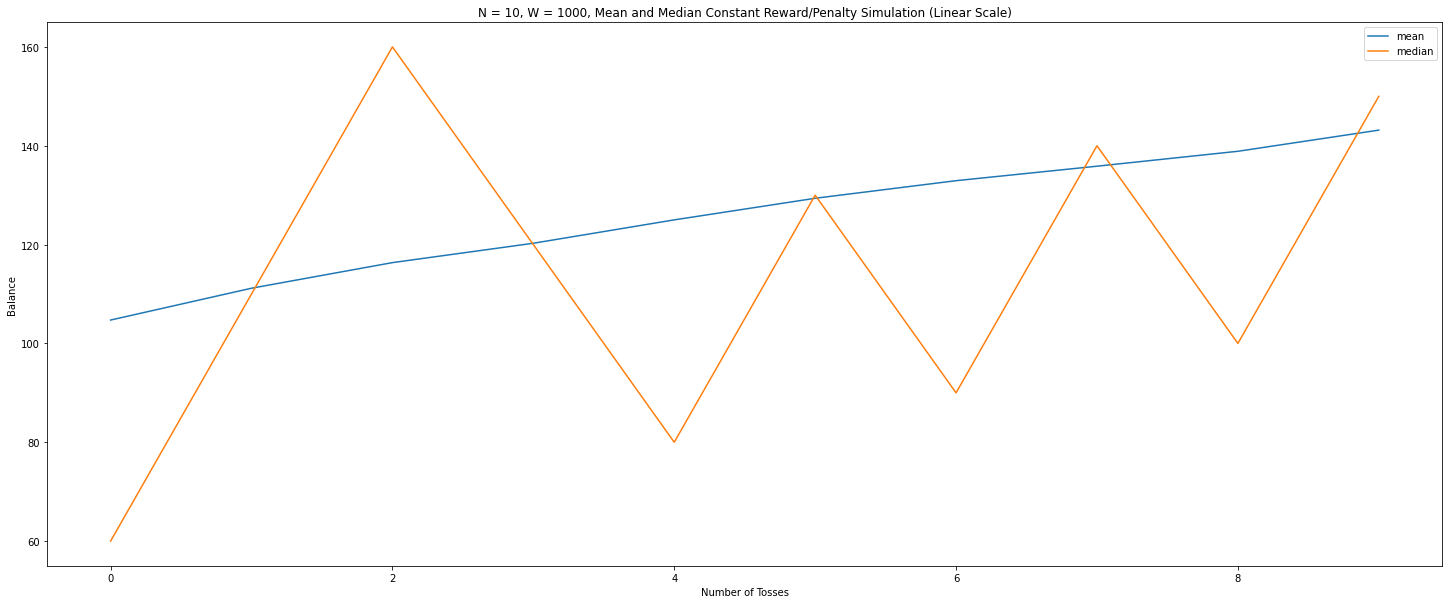

In [27]:
mean_median_10 = pd.DataFrame((np.array([list(gambler_10.mean(axis=1)),list(gambler_10.median(axis=1))])).transpose(), columns = ["mean","median"])
ax = mean_median_10.plot(figsize=(25,10))
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 10, W = 1000, Mean and Median Constant Reward/Penalty Simulation (Linear Scale)")

Text(0.5, 1.0, 'N = 10, W = 1000, Mean and Median Constant Reward/Penalty Simulation (Log Scale)')

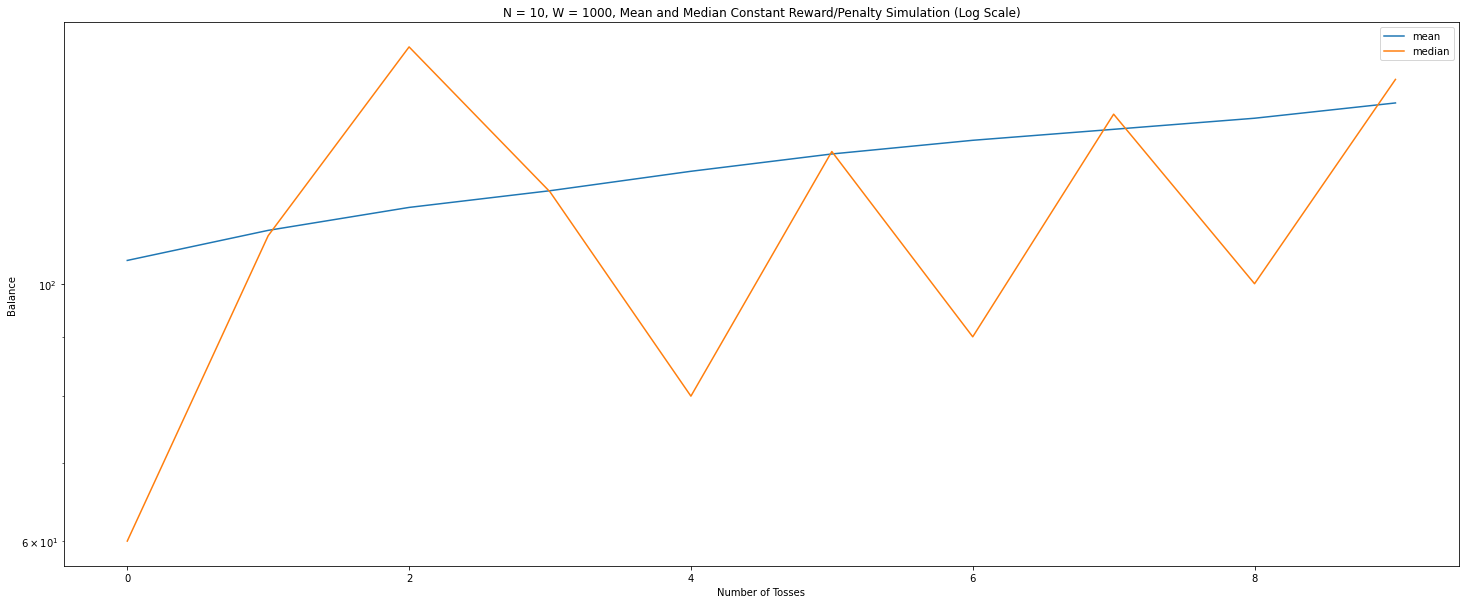

In [28]:
ax = mean_median_10.plot(figsize=(25,10), logy = True)
ax.set_xlabel("Number of Tosses")
ax.set_ylabel("Balance")
ax.set_title("N = 10, W = 1000, Mean and Median Constant Reward/Penalty Simulation (Log Scale)")

**Different from the previous logic, the over all mean and median showed an increasing trend on both log and linear scale. Mean has a relative stright linear increase over time. Median showed both an increaseing trend and seasonal(cycle) fluctuation pattern.**